# Quantization of Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Requantization of a Speech Signal

The following example illustrates the requantization of a speech signal. The signal was originally recorded with a wordlength of $w=16$ bits. It is requantized by a [uniform mid-tread quantizer](linear_uniform_characteristic.ipynb#Mid-Tread-Chacteristic-Curve) to various wordlengths. The signal-to-noise ratio (SNR) after quantization is computed and a portion of the (quantized) signal is plotted. It is further possible to listen to the requantized signal and the quantization error. Note, the level of the quantization error has been normalized for better audability of the effects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

idx = 130000  # index to start plotting


def uniform_midtread_quantizer(x, w):
    '''Uniform mid-tread quantizer with limiter.'''
    # quantization step
    Q = 1/(2**(w-1))
    # limiter
    x = np.copy(x)
    idx = np.where(x <= -1)
    x[idx] = -1
    idx = np.where(x > 1 - Q)
    x[idx] = 1 - Q
    # linear uniform quantization
    xQ = Q * np.floor(x/Q + 1/2)

    return xQ


def evaluate_requantization(x, xQ):
    '''Evaluate rquantization by plotting signals and computing SNR.'''
    e = xQ - x
    # SNR
    SNR = 10*np.log10(np.var(x)/np.var(e))
    print('SNR: {:2.1f} dB'.format(SNR))
    # plot signals
    plt.figure(figsize=(10, 4))
    plt.plot(x[idx:idx+100], label=r'signal $x[k]$')
    plt.plot(xQ[idx:idx+100], label=r'requantized signal $x_Q[k]$')
    plt.plot(e[idx:idx+100], label=r'quantization error $e[k]$')
    plt.xlabel(r'sample index $k$')
    plt.grid()
    plt.legend()
    # normalize error
    e = .2 * e / np.max(np.abs(e))
    return e


# load speech sample
x, fs = sf.read('../data/speech.wav')
# normalize sample
x = x/np.max(np.abs(x))

**Original Signal**
<audio src="../data/speech.wav" controls>Your browser does not support the audio element.</audio>
[../data/speech.wav](../data/speech.wav)

### Requantization to 8 bit

SNR: 34.0 dB


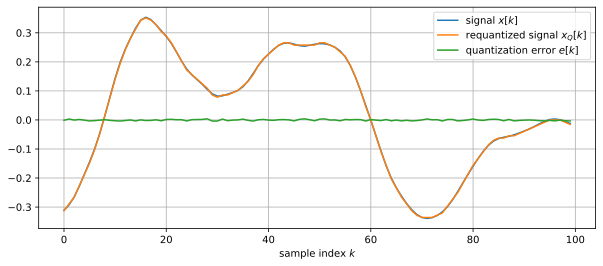

In [2]:
xQ = uniform_midtread_quantizer(x, 8)
e = evaluate_requantization(x, xQ)
sf.write('speech_8bit.wav', xQ, fs)
sf.write('speech_8bit_error.wav', e, fs)

**Requantized Signal**
<audio src="speech_8bit.wav" controls>Your browser does not support the audio element.</audio>
[speech_8bit.wav](speech_8bit.wav)

**Quantization Error**
<audio src="speech_8bit_error.wav" controls>Your browser does not support the audio element.</audio>
[speech_8bit_error.wav](speech_8bit_error.wav)

### Requantization to 6 bit

SNR: 22.9 dB


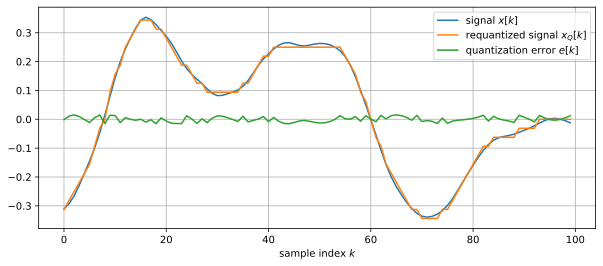

In [3]:
xQ = uniform_midtread_quantizer(x, 6)
e = evaluate_requantization(x, xQ)
sf.write('speech_6bit.wav', xQ, fs)
sf.write('speech_6bit_error.wav', e, fs)

**Requantized Signal**
<audio src="speech_6bit.wav" controls>Your browser does not support the audio element.</audio>
[speech_6bit.wav](speech_6bit.wav)

**Quantization Error**
<audio src="speech_6bit_error.wav" controls>Your browser does not support the audio element.</audio>
[speech_6bit_error.wav](speech_6bit_error.wav)

### Requantization to 4 bit

SNR: 11.7 dB


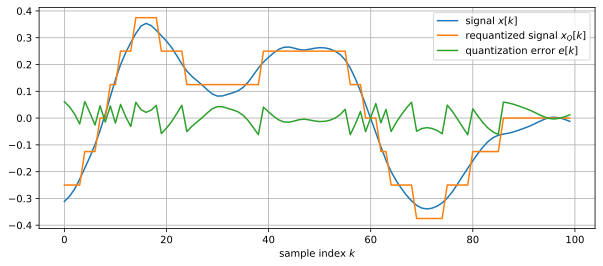

In [4]:
xQ = uniform_midtread_quantizer(x, 4)
e = evaluate_requantization(x, xQ)
sf.write('speech_4bit.wav', xQ, fs)
sf.write('speech_4bit_error.wav', e, fs)

**Requantized Signal**
<audio src="speech_4bit.wav" controls>Your browser does not support the audio element.</audio>
[speech_4bit.wav](speech_4bit.wav)

**Quantization Error**
<audio src="speech_4bit_error.wav" controls>Your browser does not support the audio element.</audio>
[speech_4bit_error.wav](speech_4bit_error.wav)

### Requantization to 2 bit

SNR: 2.4 dB


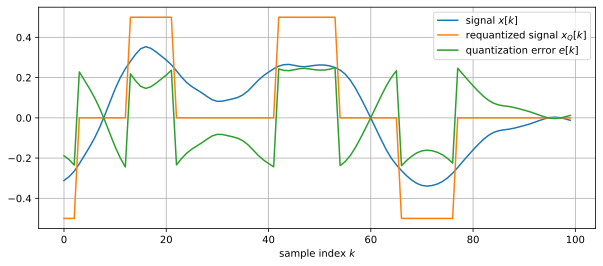

In [5]:
xQ = uniform_midtread_quantizer(x, 2)
e = evaluate_requantization(x, xQ)
sf.write('speech_2bit.wav', xQ, fs)
sf.write('speech_2bit_error.wav', e, fs)

**Requantized Signal**
<audio src="speech_2bit.wav" controls>Your browser does not support the audio element.</audio>
[speech_2bit.wav](speech_2bit.wav)

**Quantization Error**
<audio src="speech_2bit_error.wav" controls>Your browser does not support the audio element.</audio>
[speech_2bit_error.wav](speech_2bit_error.wav)

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.